##### 크롤링

In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import time
from collections import Counter
import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc  
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

#(빈)크롬창 열기
driver = webdriver.Chrome(ChromeDriverManager().install())

#네이버 지식인: 식물키우기
driver.get("https://search.naver.com/search.naver?where=kin&sm=tab_jum&query=%EC%8B%9D%EB%AC%BC%ED%82%A4%EC%9A%B0%EA%B8%B0")
driver.maximize_window()
time.sleep(3)

#옵션 클릭
opt = driver.find_element_by_css_selector('#snb > div.api_group_option_filter._search_option_simple_wrap > div > div.option_filter > a')
opt.click()
time.sleep(1)

#6개월 클릭
month = driver.find_element_by_css_selector('#snb > div.api_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.option > a:nth-child(7)')
month.click()

all_contents_list=[]
while True:
    try:
        for i in range(1, 11):
            list = driver.find_element_by_css_selector(f"#main_pack > section.sc_new.sp_nkin._au_kin_collection > div > ul > li:nth-child({i}) > div > div.question_area > div.question_group > a")
            list.click()
            #time.sleep(1)
            
            driver.switch_to.window(driver.window_handles[1])
            #time.sleep(1)
                                                               
            #제목이랑 내용 함께 추출하고 싶을 때                                   
            all_contents=driver.find_elements_by_css_selector('#content > div.question-content > div')
            for j in all_contents:                              
                all_contents_list.append(j.text)
            #time.sleep(1)
            
            driver.close()
            #time.sleep(1)
            driver.switch_to.window(driver.window_handles[0])

                                                    
        next = driver.find_element_by_css_selector("#main_pack > div.api_sc_page_wrap > div > a.btn_next")
        next.click()

    except:
        break

In [63]:
len(all_contents_list)

1000

##### 텍스트 정제하기 with 정규표현식

In [3]:
#형태소 분석기를 통해 텍스트 정제하기
from konlpy.tag import Okt
okt=Okt()
import re

#필요없는 표시들 지우기
result_list =[]
for i in all_contents_list:
    result = i.replace("\n", "")
    result = result.replace('질문', '')
    result = result.replace('?', '')
    result = result.replace('나눈', '')
    result = result.replace('내공', '')
    result = result.replace('[', '')
    result = result.replace(']', '')
    result = result.replace('^', '')
    result = re.sub('ㅠ|ㅜ|ㅎ|ㅋ|ㅇ|!|~', '', result)
    
    #        정규표현식
    result = re.compile("태그\s디렉터리.+").sub("", result)
    result = re.compile("[a-zA-Z0-9]").sub("", result)
    result_list.append(result)

result_list

[' 식물키우기식물을 잘 키우고 싶은데 어렵네요요아이도 키우기 쉬울거 같았는데 점점 이렇게 되어가는데 어떻게 살릴수있을까요요아이 이름도 모르고 도움부탁드려요',
 '율마 식물 키우기안녕하세요. 얼마전부터 식물을 키우고 있는데요, 도움을 얻고 싶어 드립니다.. 식물 잎의 가장가지가 갈색이 됩니다. 과습이 원인인가요그렇다면 해결방은 무엇인가요 영양제 이런 걸 줘야 하는지.... 율마를 키우는데, 물 자주 줘야 하는 식물인지 몰라서 ,주전에 물을 주고 안줬어요 그랬더니 잎이 갈색을 띄고, 만지니까 말라서 바스락 하며 잎이 다 떼져요. 아예 죽어버린건가요 살릴 수 있는 방법이 있으면 알려주세요.. 안시리움도 키우는데 잎이 빨개져요, 얘는... 이렇게 되는 원인이 뭔가요 대처방안도 알려주세요.감사합니다.',
 '식물 키우기 . 이 식물 이름이 뭔가요. 초심자가 보기에 잎에 비해 화분이 작아 보이는데 화분 갈이 해줘야 할까여',
 '식물키우기 어렵네요식물들 데려오고는 년정도가 지나면 항상 고민되는것이 이렇게 자라면 후에 어떻게 해야되는지를 모르겠어요이렇게 키우다보면 곧 죽더라구여이번식물들은 오래 같이 하고싶은데 도움 좀 부탁드려요첫번째 식물은 화분을 그대로 사용해도 되나요그리고 옆에 작은친구를 떼내서 따로 키울수 있나요두번째 식물은 점점 시들어 가고 너무 키가 크게 자라는데 어떻게 손봐야 하나요마지막으로 이런 궁금증이랑 문제들은 어디서 해결할 수 있나요 꽃집에 화분을 직접 들고가야 하는가요식물키우기는 완전초보라 이 많네요답변 부탁드립니다',
 '식물 키우기, 종류 이름제가 오늘 식물을 받았어요 받은거는 노란색 화분에 있는거고 나머지 두개는 동생방에서 있는거 가져 왔어요 잘 키워보려고 하는데 이름을.. 이 식물들 이름이 뭔가요..그 플라스틱에 있는거는 원래 작은 빨간 열매도 있었어요아 그리고 각 어떻게 관리하고 키우는지도 좀 알려주세요',
 '요즘에 한창 식물 키우기에 관심이 생겨 이번에 드디어 몇몇 친구들을 데려다 와 키우기 시작했어요.유칼립투스 종류가 여럿 있고 랜덤 

##### 데이터타입: 리스트를 스트링으로 변환시켜주기

In [4]:
str = ''.join(result_list)
type(result_list), type(str)

(list, str)

##### 워드클라우드-명사편

In [5]:
#불용어 지우기
stopwords=['좀', '요', '것', '제', '때', '수', '이', '더', '가요', '걸', '개', '적', '막', '요물', '번', '사진',
           '데', '요즘', '언제', '게', '점', '이면', '건', '보', '법', '내', '위해', '얘', '초', '중', '추가',
           '월', '글', '주', '하나', '등등', '나', '그', '저', '아시', '보고', '저희', '이번', '못', '물주',
           '분', '년', '등', '복', '후', '해도', '다시', '과학', '건가', '또', '달', '난', '전', '늘', '하나요',
           '녹', '물이', '줄', '살', '시', '목', '스']

#명사
def extract_tag(string):
    result_words=[]
    result = okt.pos(string, stem=True, norm=True)
    for word, tag in result:
        if tag in ['Noun']:
            if word not in stopwords:
                result_words.append(word)
    return result_words

#데이터타입 변경해준 result_list를 함수에 대입
text_data = extract_tag(str)

#빈도수 세기
count_n = Counter(text_data)

#빈출 단어 뽑기
count_n.most_common(20)

[('식물', 1410),
 ('잎', 469),
 ('물', 430),
 ('이름', 315),
 ('화분', 280),
 ('추천', 202),
 ('정도', 184),
 ('방법', 183),
 ('집', 170),
 ('꽃', 148),
 ('흙', 145),
 ('분갈이', 138),
 ('햇빛', 135),
 ('왜', 124),
 ('나무', 123),
 ('안', 111),
 ('한번', 111),
 ('생각', 110),
 ('관리', 106),
 ('선물', 102)]

In [60]:
#이미지를 불러올 수 있는 라이브러리 추가 실행
from PIL import Image

#이미지 불러오기
mask_image = Image.open(r"C:\Users\user\OneDrive\바탕 화면\TheOneMINI2(최종)\해바라기.png")

#받아온 이미지 행렬화: np.array
mask_image = np.array(Image.open(r"C:\Users\user\OneDrive\바탕 화면\TheOneMINI2(최종)\해바라기.png"))


<function matplotlib.pyplot.show(close=None, block=None)>

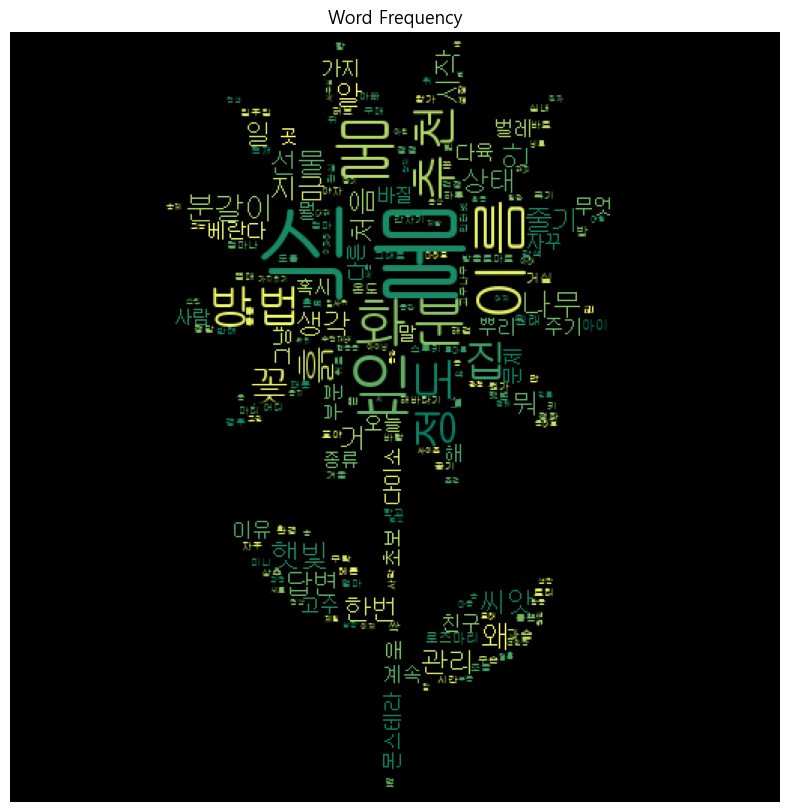

In [61]:
#워드클라우드
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\gulim.ttc', width = 700, height = 700, background_color = 'black', 
                      mask=mask_image, colormap = 'summer', random_state =1).generate_from_frequencies(count_n)

#빈출단어 시각화
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size =13)
plt.show

##### 파이차트-명사편

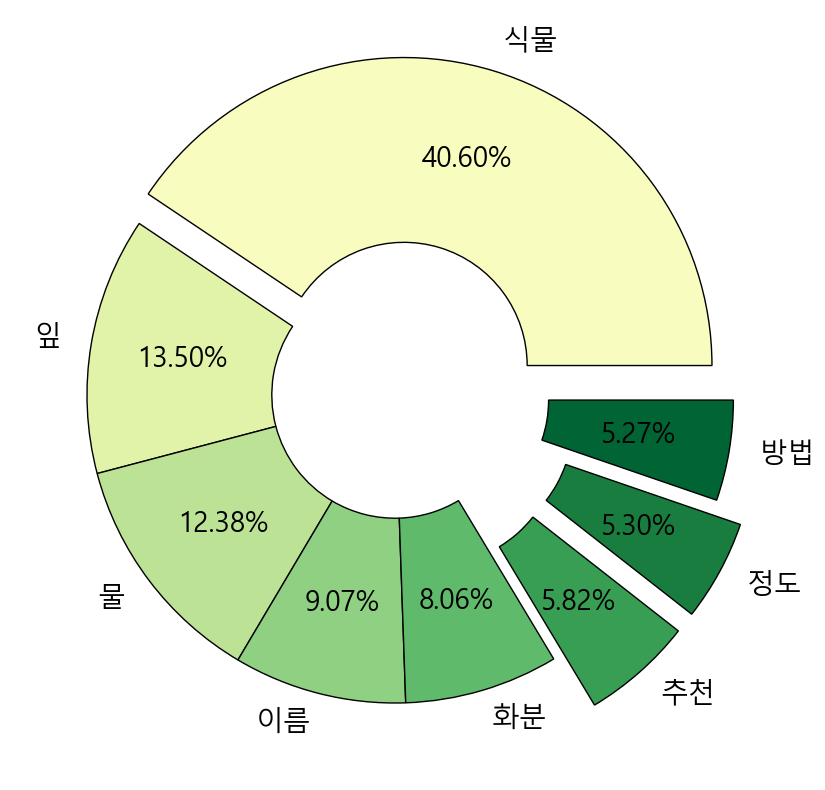

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc  
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

n=count_n.most_common(8)
n

df = pd.DataFrame(n, columns=['명사', '빈도수'])
wedgeprops={'width' : 0.6, 'edgecolor' : 'black', 'linewidth' : 1}
plt.figure(figsize=(10, 10))
colors=sns.color_palette('YlGn', len(df['명사']))
plt.pie(df['빈도수'], labels = df['명사'], textprops={'size' : 20}, autopct = '%0.2f%%', colors=colors, 
        explode = [0.1, 0, 0, 0, 0, 0.2, 0.2, 0.1], wedgeprops=wedgeprops, pctdistance = 0.7)

plt.show()

##### 워드클라우드-동사편

In [34]:
#불용어 지우기
stopwords=['있다', '하다', '되다', '돼다', '싶다', '보다', '해주다', '들다', '자다', '끄다', '오다', '가다', '이다',
           '찍다', '그려지다', '그리다', '이르다', '읽다', '겁니다', '파다', '저러다', '데리다', '달다', '날다',
           '따르다', '추다', '적히다', '끼다', '짜다', '비다']

#동사
def extract_tag2(string):
    result_words=[]
    result = okt.pos(string, stem=True, norm=True)
    for word, tag in result:
        if tag in ['Verb']:
            if word not in stopwords:
                result_words.append(word)
    return result_words

text_data = extract_tag2(str)

#빈도수 세기
count_v = Counter(text_data)

#빈출 단어 뽑기
v=count_v.most_common(20)
v

[('키우다', 1677),
 ('주다', 398),
 ('알다', 394),
 ('자라다', 206),
 ('모르다', 192),
 ('않다', 192),
 ('죽다', 144),
 ('자르다', 139),
 ('받다', 128),
 ('크다', 126),
 ('두다', 112),
 ('심다', 104),
 ('생기다', 93),
 ('드리다', 88),
 ('도와주다', 72),
 ('감사하다', 68),
 ('나오다', 66),
 ('건지다', 60),
 ('치다', 58),
 ('나다', 56)]

<function matplotlib.pyplot.show(close=None, block=None)>

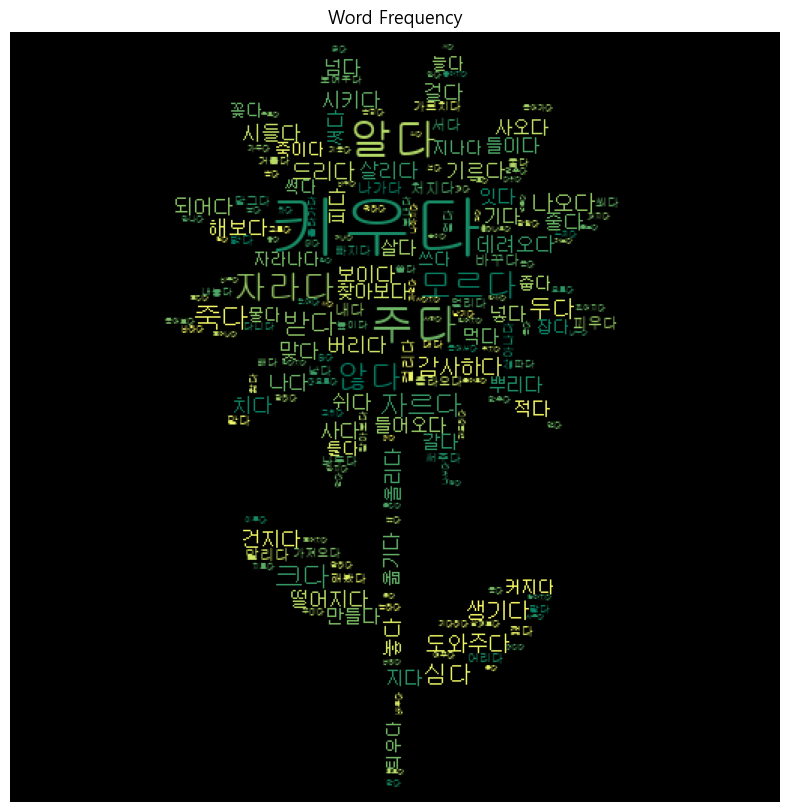

In [62]:
#워드클라우드
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\gulim.ttc', width = 700, height = 700, background_color = 'black', 
                       mask = mask_image, colormap = 'summer', random_state =1).generate_from_frequencies(count_v)

#빈출단어 시각화
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size =13)
plt.show

##### 파이차트-동사편

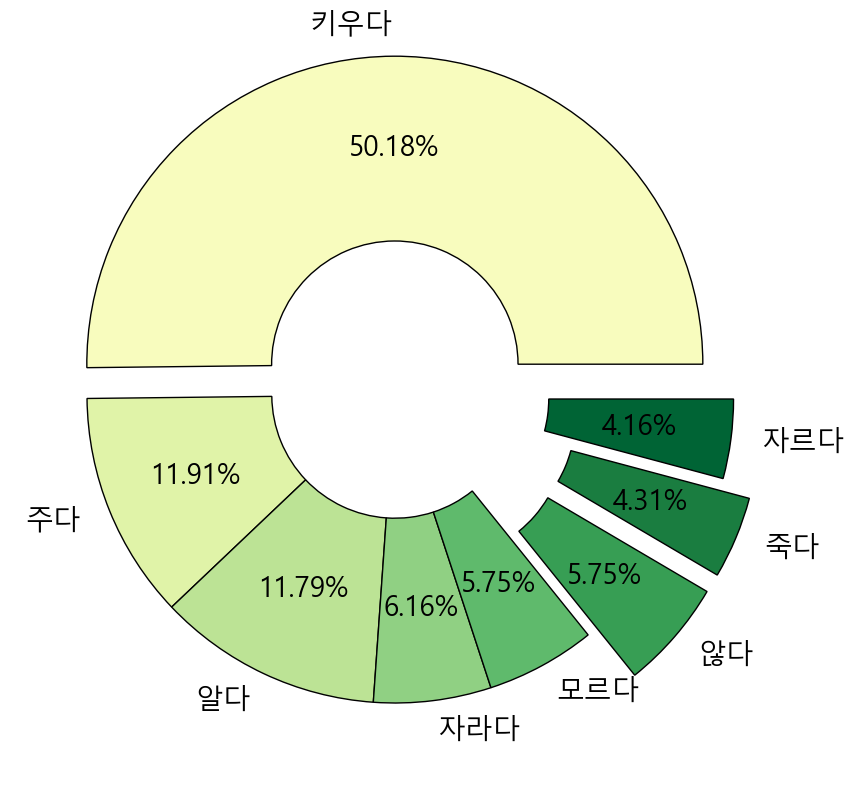

<Figure size 640x480 with 0 Axes>

In [10]:
v=count_v.most_common(8)

df = pd.DataFrame(v, columns=['동사', '빈도수'])

colors=sns.color_palette('YlGn', len(df['동사']))

plt.figure(figsize=(10, 10))

plt.pie(df['빈도수'], labels = df['동사'], textprops={'size' : 20}, autopct = '%0.2f%%', colors=colors, 
        explode = [0.1, 0, 0, 0, 0, 0.2, 0.2, 0.1], wedgeprops=wedgeprops, pctdistance = 0.7)


plt.show()
plt.savefig('verb_pie.png')